# Blockcluster basic example

## Data

Load the CSV data file as dataframe.

In [3]:
data <- as.matrix(read.table("blockcluster-example.csv", sep = ","))
head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
1,1,1,0,1,1,1,1,1,0,⋯,0,0,0,0,0,0,1,0,1,1
0,0,1,0,0,0,0,0,0,1,⋯,0,1,0,0,1,1,1,1,0,0
0,1,1,0,1,1,1,1,1,0,⋯,0,0,1,1,1,0,1,0,0,0
0,0,0,0,1,0,1,1,0,1,⋯,1,1,1,0,0,1,1,0,0,0
0,0,0,1,1,1,1,1,1,0,⋯,0,0,0,0,1,1,0,0,0,1
1,1,1,1,0,0,1,1,0,1,⋯,1,1,0,0,1,1,1,0,0,0


## Clustering with Blockcluster

Launch the BlockCluster package.

In [4]:
library(blockcluster)

Loading required package: rtkore

Loading required package: Rcpp


Attaching package: ‘rtkore’


The following object is masked from ‘package:Rcpp’:

    LdFlags


blockcluster version 4.4.3 loaded

----------------
Copyright (C)  <MODAL team @INRIA,Lille & U.M.R. C.N.R.S. 6599 Heudiasyc, UTC>
Please post questions and bugs at: <https://gforge.inria.fr/forum/forum.php?forum_id=11190&group_id=3679>




Define the strategy.

Specify the number of groups/clusters to create in rows and coloumns.

In [5]:
rowClusters <- 2
columnClusters <- 3

Run the coclustering.

In [6]:
res <- cocluster(data, datatype = "binary", nbcocluster = c(rowClusters, columnClusters))

Co-Clustering successfully terminated! 


## Output's Analysis

### Model criterion

This chart represents the criterion value for each model that was built. The lower the value (close to 0) the better the model.

In [7]:
res@ICLvalue

[1] -45557.07

### Cluster Plot

Draw the original data matrix, and the matrix obtained after performing co-clustering

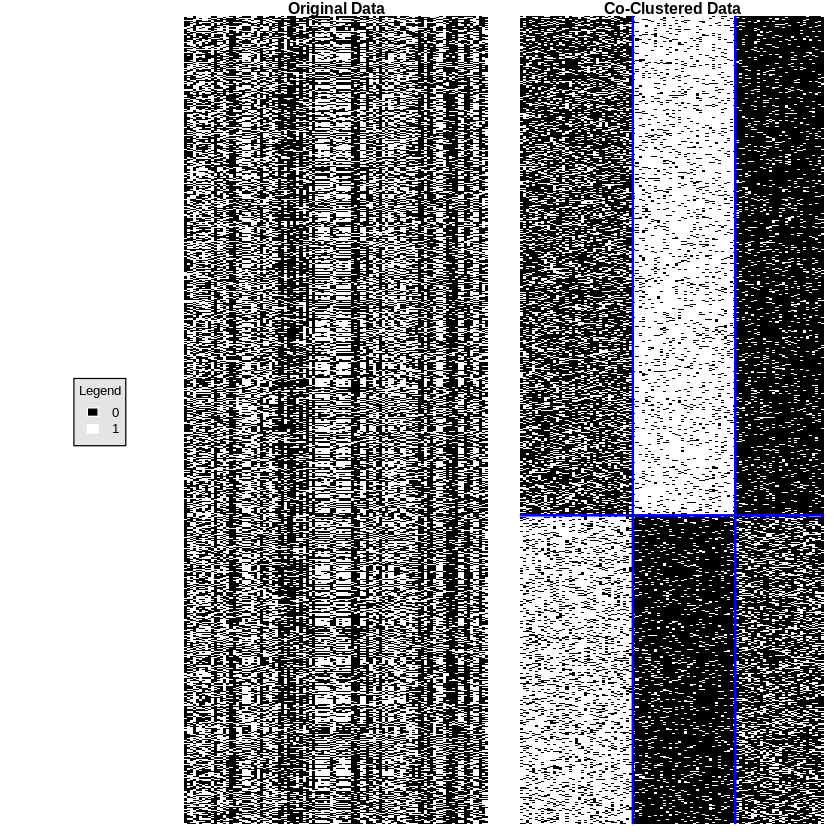

In [8]:
plot(res)